# <a id='toc1_'></a>[Fundamentals of risk and returns](#toc0_)
  
1st week, 1st section, Introduction to Portfolio Construction and Analysis with Python
Vijay Vaidyanathan & Lionel Martellini
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [Fundamentals of risk and returns](#toc1_)    
  - [Lecture 1 - Returns and compounds returns](#toc1_1_)    
  - [Lecture 2 - Volatility](#toc1_2_)    
  - [Lecture 3 - Risk adjusted measures](#toc1_3_)    
  - [Lecture 4 - Measuring Max Drawdown](#toc1_4_)    
  - [Lab 1 - intro to returns and pandas](#toc1_5_)    
      - [Getting the returns faster with pandas](#toc1_5_1_1_)    
      - [A few graphs of prices and returns](#toc1_5_1_2_)    
      - [Basic descriptive statistics in pandas](#toc1_5_1_3_)    
      - [Annualizing returns](#toc1_5_1_4_)    
  - [Lab 2 - returns, volatility and risk adjusted measures](#toc1_6_)    
    - [Get the returns and the volatility on the small price dataset](#toc1_6_1_)    
    - [Working on a more realistic dataset](#toc1_6_2_)    
      - [Importing and cleaning the data](#toc1_6_2_1_)    
      - [Plotting the data](#toc1_6_2_2_)    
      - [Annualized returns and volatility](#toc1_6_2_3_)    
      - [Risk adjusted measures](#toc1_6_2_4_)    
  - [Lab 3 - Drawdowns](#toc1_7_)    
    - [Importing and cleaning the data](#toc1_7_1_)    
    - [Compute drawdown for small caps](#toc1_7_2_)    
    - [Compute the drawdowns with a function for the large caps](#toc1_7_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - Returns and compounds returns](#toc0_)

 Basic measure of return (sometimes shown as 1+return) :
 $$ R_{t,t+1}= \frac{P_{t+1}-P_t}{P_t} $$
  
Do not forget include the dividends in the calculus of the return (otherwise you get the price return which is far less used).
 $$ R_{t,t+1}= \frac{P_{t+1}+D_{t-t+1}-P_t}{P_t} $$
   
If there is various periods, just multiply the returns.
$$ R_{tot}=(1+R_{t,t+1}) \times (1+R_{t+1,t+2})-1 $$

## <a id='toc1_2_'></a>[Lecture 2 - Volatility](#toc0_)
Different investments often have the same average return but different volatility (important variable to take into account in an investment strategy).  
  
Variance (and standard desviation) is often used as a measure of volatility:
$$ \sigma^2_R=\frac{1}{N}\sum_{i=1}^N (R_i-\overline{R})^2 $$
$$ \sigma_R=\sqrt{\sigma^2_R} $$
  
It is impossible to compare annual and monthly data for volatility (p), so you need to compute it that way: 
$$ \sigma_{annual}=\sigma_p\times \sqrt{p} $$
if a stock has a 0.1% std daily it makes an annual std 1.58% (as there is 252 market days a year):
$ 0.001 \times \sqrt{252} = 1.58% $

## <a id='toc1_3_'></a>[Lecture 3 - Risk adjusted measures](#toc0_)
If we compare returns of US small cap. and US large cap. for instance, over the last century the return is higher for the first ones but at the price of a way higher volatility.   
How to compare those 2: 
- get the retio of return over volatility: $ {Return\_on\_risk} = \frac{R_i}{\sigma_i} $
- excess over the risk free rate: we call it the Sharpe ratio and it is one of the most important ratio to measure performance: $  P_i =  \frac{R_i-R_f}{\sigma_i}  $


## <a id='toc1_4_'></a>[Lecture 4 - Measuring Max Drawdown](#toc0_)
The problem with volatility is that upside volatility is a good thing but not downside. Max drawdown is another measure of risk which is not volatility and diplays another point of view on risk.    
  
It represents the maximum loss, when an agent buys at the highest value of the asset and sells at its lowest. It's the worst return in the record of the asset, and displays the most unlucky scenario that a potential investor had in the past.
  
To compute it one has to:
- get the wealth index for a given asset
- record the peak experienced for each period
- compute drawdown for each period: the distance between the current value and the peak
- get the maximal value
  
One can obtain a diferent return on risk ratio based on drawdown, its called the Calmar ratio and is the annualized return over the trailing 36 month maximun drawdown.
  
The problem with drawdown is that they are defined by two data points (max and lowest), and rely on the frequency of the data (daily data erase most of the intraday extremas). It's commonly used indicator but other more robust ones can do better (Value-at-risk, CVAR...).

## <a id='toc1_5_'></a>[Lab 1 - intro to returns and pandas](#toc0_)

In [1]:
def rendement(P_t0,P_t1,Div_t0_t1):
    rendement=(P_t1-P_t0+Div_t0_t1)/P_t0
    return rendement
    
print(rendement(10,12,0))


def rendement_plus1(P_t0,P_t1,Div_t0_t1):
    rendement=(P_t1+Div_t0_t1)/P_t0
    return rendement
    
print(rendement_plus1(10,12,0))

0.2
1.2


#### <a id='toc1_5_1_1_'></a>[Getting the returns faster with pandas](#toc0_)

In [2]:
prices_a=[8.7,8.91,8.71]

print((prices_a[1]-prices_a[0])/prices_a[0])
print(rendement(prices_a[0],prices_a[1],0))

print(rendement(prices_a[1],prices_a[2],0))

0.02413793103448286
0.02413793103448286
-0.0224466891133557



Unluckily it's impossible to use directly the list to compute all returns as it is not vectorized, hence the use of numpys or even better: pandas !

In [3]:
import numpy as np
prices_a2=np.array(prices_a)
prices_a2[1:]/prices_a2[:-1]-1

array([ 0.02413793, -0.02244669])

In [4]:
import pandas as pd
prices = pd.DataFrame({"inv_1":[8.7,8.9055,8.7113,8.4346,8.7254,9.0551,8.9514,9.2439,9.1276,9.3979,9.4554,9.5704,9.7728],
                       "inv_2":[10.66,11.0828,10.71,11.5907,12.107,11.7876,11.2078,12.5192,13.3624,14.408,11.9837,12.2718,11.5892]})
prices

,inv_1,inv_2
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3979,14.4080


The direct division doesn't work as pandas aligns directly the dfs.

In [5]:
print("not good")
prices.iloc[1:]/prices.iloc[:-1]-1

not good


,inv_1,inv_2
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


A first solution which is quite 'primitive' is to take the values for one of the df.

In [6]:
print("better")
prices.iloc[1:].values/prices.iloc[:-1]-1
prices.iloc[1:]/prices.iloc[:-1].values-1


better


,inv_1,inv_2
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029613,0.078249
10,0.006118,-0.168261


We can also shift the second df with the method shift

In [7]:
print("good way")
prices/prices.shift(1)-1

good way


,inv_1,inv_2
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029613,0.078249


It's even better to use the method pct_change from pandas to get directly the results.

In [8]:
print("best way")
returns=prices.pct_change()
returns

best way


,inv_1,inv_2
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029613,0.078249


#### <a id='toc1_5_1_2_'></a>[A few graphs of prices and returns](#toc0_)

<AxesSubplot: >

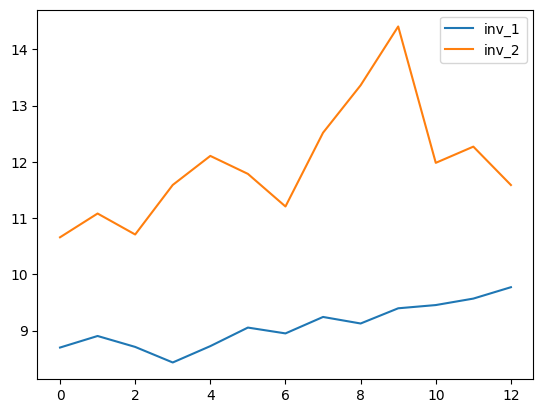

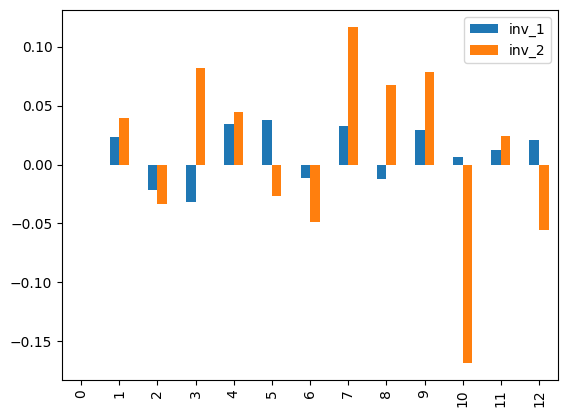

In [9]:
prices.plot()
returns.plot.bar()

#### <a id='toc1_5_1_3_'></a>[Basic descriptive statistics in pandas](#toc0_)
We use the following methods to get the standard desviation, the means and the compound returns:

In [10]:
return_std=returns.std()

In [11]:
ave_return=returns.mean()

In [12]:
np.prod(returns+1)-1
compound_return=(returns+1).prod()-1

#### <a id='toc1_5_1_4_'></a>[Annualizing returns](#toc0_)

In [13]:
rm=0.01
((1+rm)**12)-1

0.12682503013196977

## <a id='toc1_6_'></a>[Lab 2 - returns, volatility and risk adjusted measures](#toc0_)

### <a id='toc1_6_1_'></a>[Get the returns and the volatility on the small price dataset](#toc0_)

In [14]:
import pandas as pd
prices = pd.DataFrame({"inv_1":[8.7,8.9055,8.7113,8.4346,8.7254,9.0551,8.9514,9.2439,9.1276,9.3979,9.4554,9.5704,9.7728],
                       "inv_2":[10.66,11.0828,10.71,11.5907,12.107,11.7876,11.2078,12.5192,13.3624,14.408,11.9837,12.2718,11.5892]})
# in the video they import the csv but we don't have it as we are cheap bitches

returns=prices.pct_change().dropna()
returns

,inv_1,inv_2
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029613,0.078249
10,0.006118,-0.168261


To get the voltility we can use the methode std from pandas or compute it ourselves (which is far less efficient):

In [15]:
returns.std()

inv_1    0.023980
inv_2    0.079601
dtype: float64

In [16]:
deviations = returns - returns.mean()
sq_deviations= deviations**2
variance=sq_deviations.mean()
volatility=variance**0.5
volatility

inv_1    0.022959
inv_2    0.076212
dtype: float64

We can see that the values are close but not exactly the same. It's because our computations doesn't take into acount the loss of an observation (degrees of freedom) in the standard desviation measure (the denominator is not n but n-1). to get it right:

In [17]:
nb_obs=len(returns) ## or nb_obs=returns.shape[0]
variance=sq_deviations.sum()/(nb_obs-1)
volatility=variance**0.5
volatility

inv_1    0.023980
inv_2    0.079601
dtype: float64

We get exactly the same values (better stick with the pandas method ^^). We also need to annualize this montly data:

In [18]:
returns.std()*(12**0.5)

inv_1    0.083070
inv_2    0.275747
dtype: float64

In [19]:
# just to clean the variable section
del(deviations, compound_return, ave_return, nb_obs,prices, prices_a, prices_a2,return_std, returns, rm, sq_deviations,variance, volatility)

### <a id='toc1_6_2_'></a>[Working on a more realistic dataset](#toc0_)
This dataset consist of historical (1926-2018) monthly data of the US stock market with different type of indexes (columns) based on maket capitalization.
  
#### <a id='toc1_6_2_1_'></a>[Importing and cleaning the data](#toc0_)

In [20]:
import pandas as pd
# luckily I have found a git repository with all the data: https://github.com/z4ir3/finance-courses/tree/master/data
returns=pd.read_csv("https://raw.githubusercontent.com/z4ir3/finance-courses/master/data/Portfolios_Formed_on_ME_monthly_EW.csv",
               header=0, index_col=0, parse_dates=True,na_values=-99.99
               ) 
## header to say the first row is the col names, index_col to say the the forst col is the index
## parse_dates tries to parse any col looking like a date, na_values to specify the na_value in the set
# df.to_csv() to save the fine on my pc


In [21]:
returns=returns[['Lo 10', 'Hi 10']] # keep the useful data
returns.columns=['SmallCap','LargeCap'] # rename cols
returns=returns/100  #get the values in decimal

#### <a id='toc1_6_2_2_'></a>[Plotting the data](#toc0_)

<AxesSubplot: >

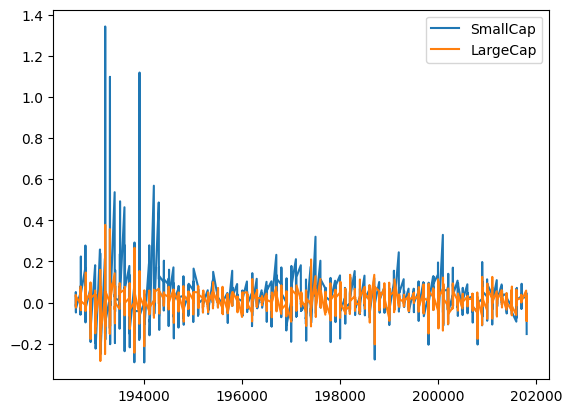

In [22]:
returns.plot()

#### <a id='toc1_6_2_3_'></a>[Annualized returns and volatility](#toc0_)

Anualized volatility (formula we saw before):

In [23]:
annualized_volatility=returns.std()*(12**0.5)
annualized_volatility

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

Anualized returns: 
1) monthly average (geometrical mean) return over the whole period (we get the compounds return for all periods -product of all returns- and get it to the inverse power of the number of periods) and thenannualize it 
2) or doing it in the same formula
  

In [24]:
#1.
return_per_month=(returns+1).prod()**(1/len(returns)) - 1 ## the inverse of anualization, len(returns) gives the number of months
annualized_return=(1+return_per_month)**12 -1
print(return_per_month,"\n",annualized_return)

SmallCap    0.012986
LargeCap    0.007423
dtype: float64 
 SmallCap    0.167463
LargeCap    0.092810
dtype: float64


In [25]:
#2.
annualized_return=(returns+1).prod()**(12/len(returns))-1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

#### <a id='toc1_6_2_4_'></a>[Risk adjusted measures](#toc0_)

To see which investment is the best we have to compute:
1) the return on risk ratio
2) Sharpe ratio

In [26]:
return_on_risk=annualized_return/annualized_volatility
risk_free_rate=0.03 #not the proper way to do it, one should get the time series of the risk free rate
excess_return=annualized_return-risk_free_rate
sharpe_ratio=excess_return/annualized_volatility

print("return on risk ratio","\n",return_on_risk,"\n","Sharpe ratio","\n",sharpe_ratio)


return on risk ratio 
 SmallCap    0.454825
LargeCap    0.497063
dtype: float64 
 Sharpe ratio 
 SmallCap    0.373346
LargeCap    0.336392
dtype: float64


No clear winner her between the large cap (1st decile) and the small cap (10th decile), depending on the retio used

In [27]:
# just keeping the df we will use in the next lab
del(returns,annualized_return,annualized_volatility,excess_return,return_on_risk,return_per_month,risk_free_rate,sharpe_ratio)

## <a id='toc1_7_'></a>[Lab 3 - Drawdowns](#toc0_)

### <a id='toc1_7_1_'></a>[Importing and cleaning the data](#toc0_)

In [28]:
import pandas as pd

# as said befor luckily I have found a git repository with all the data: 
# https://github.com/z4ir3/finance-courses/tree/master/data
rets=pd.read_csv("https://raw.githubusercontent.com/z4ir3/finance-courses/master/data/Portfolios_Formed_on_ME_monthly_EW.csv",
               header=0, index_col=0, parse_dates=True,na_values=-99.99
                    )              
               
rets=rets[['Lo 10', 'Hi 10']] 
rets.columns=['SmallCap','LargeCap'] 
rets=rets/100 

rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

We still have issues with the date (date_parse didn't work): as we can see they are still integers and not date variables.

In [29]:
rets.index= pd.to_datetime(rets.index, format="%Y%m").to_period('M')
# to_datetime transforms into a date with a format specified and to_period treat that array a period and not a day 
rets.head

<bound method NDFrame.head of          SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270
...           ...       ...
2018-08    0.0241    0.0234
2018-09   -0.0168    0.0087
2018-10   -0.1002   -0.0657
2018-11   -0.0365    0.0253
2018-12   -0.1531   -0.0890

[1110 rows x 2 columns]>

### <a id='toc1_7_2_'></a>[Compute drawdown for small caps](#toc0_)
Method to do so for the large cap:
1) Compute the wealth index


<AxesSubplot: >

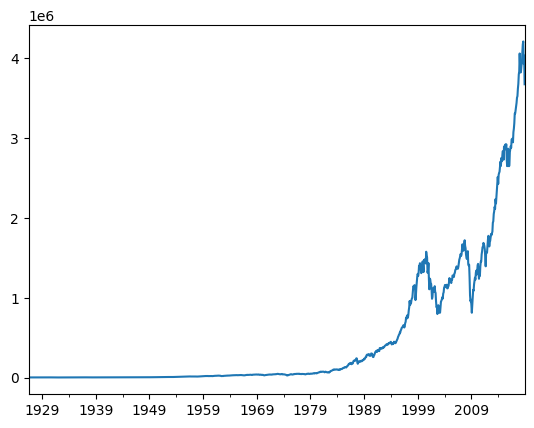

In [30]:
wealth_index=1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot.line()

2) Compute previous peaks

<AxesSubplot: >

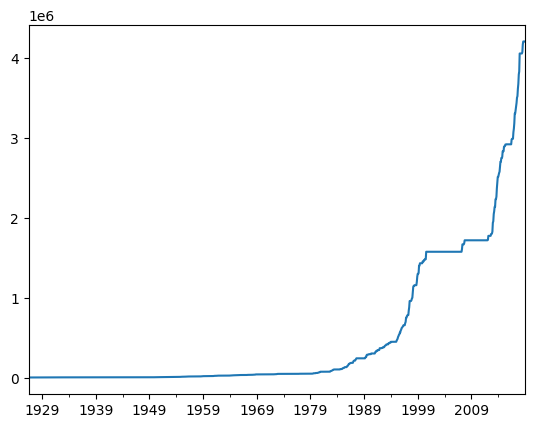

In [31]:
previous_peaks=wealth_index.cummax()
previous_peaks.plot.line()

3) Compute drawdown - which is the wealth value as a percentage of the previous peak

<AxesSubplot: >

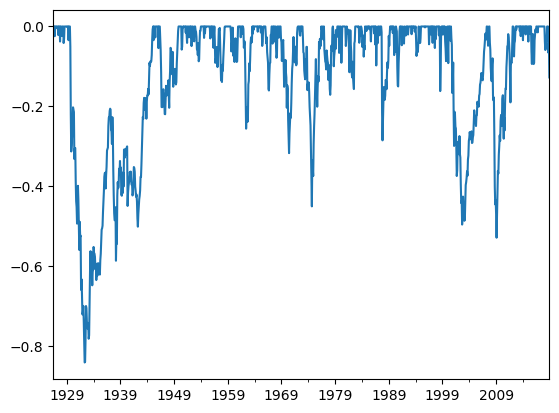

In [32]:
drawdown_sc=wealth_index/previous_peaks - 1
drawdown_sc.plot()

4) Get the max (min if computed negatively)

In [33]:
print(drawdown_sc.min(),drawdown_sc.idxmin())
print(drawdown_sc["1975":].min(),drawdown_sc["1975":].idxmin())

-0.8400375277943123 1932-05
-0.5280945042309304 2009-02


### <a id='toc1_7_3_'></a>[Compute the drawdowns with a function for the large caps](#toc0_)

In [34]:
def drawdowns(return_series: pd.Series):
    """
    Args:
        return_series (pd.Series): take a time serie of asset returns

    Returns:
        _type_: a df with wealth_index, past peaks and drawdown for each period
    """
    a=1000*(1+return_series).cumprod()
    b=a.cummax()
    c=a/b-1
    return pd.DataFrame({"wealth_index":a,
                         "peaks":b,
                         "drawdowns":c
                         })

As we have built the function we call it and plot the results for large cap.

-0.8400375277943123 1932-05


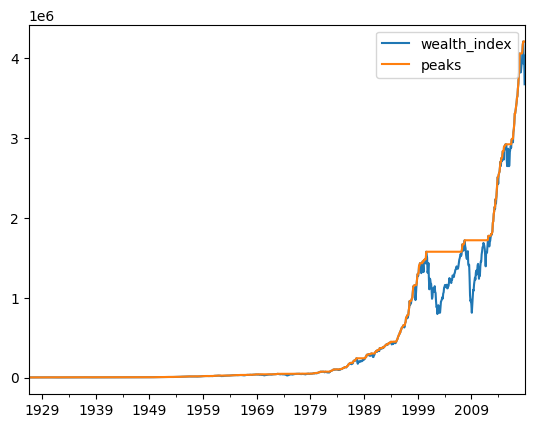

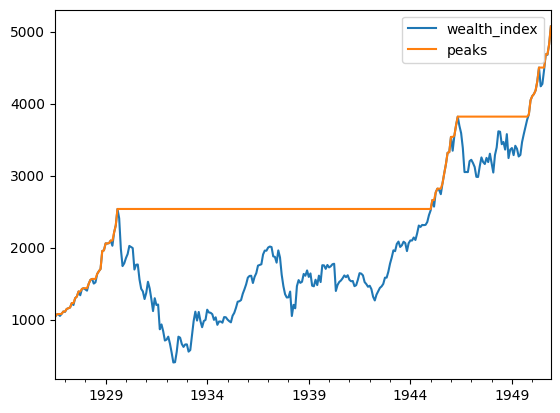

In [35]:
drawdowns_lc=drawdowns(rets["LargeCap"])

drawdowns_lc[["wealth_index","peaks"]].plot()
drawdowns_lc[:"1950"][["wealth_index","peaks"]].plot()

print(drawdowns_lc["drawdowns"].min(),drawdowns_lc["drawdowns"].idxmin())


As we have built a function it is easy to change the parameters and get the results for another series.

In [36]:
drawdowns_sc=drawdowns(rets["SmallCap"])
print(drawdowns_sc["drawdowns"].min(),drawdowns_sc["drawdowns"].idxmin())

-0.8330007793945303 1932-05


In [37]:
print(drawdowns_lc["1940":]["drawdowns"].min(),drawdowns_lc["1940":]["drawdowns"].idxmin())
print(drawdowns_sc["1940":]["drawdowns"].min(),drawdowns_sc["1940":]["drawdowns"].idxmin())

-0.5280945042309304 2009-02
-0.7000596091967912 1974-12


In [38]:
print(drawdowns_lc["1975":]["drawdowns"].min(),drawdowns_lc["1975":]["drawdowns"].idxmin())
print(drawdowns_sc["1975":]["drawdowns"].min(),drawdowns_sc["1975":]["drawdowns"].idxmin())

-0.5280945042309304 2009-02
-0.631206807725239 2009-02
